In [1]:
# Use MNIST digit clasification Dataset
# Hello WOrld of ML


# Binary Class Classification

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y  = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
 y.shape

(70000,)

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

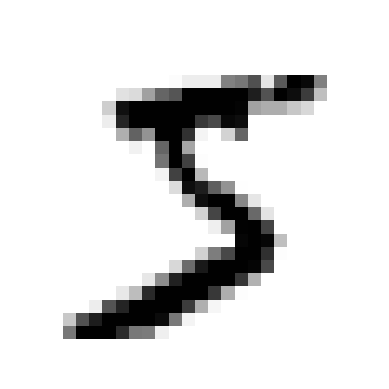

In [6]:
some_digit = X.iloc[0]
some_digit_image = np.array(some_digit)
some_digit_image = some_digit_image.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [7]:
y = y.astype(np.uint8)


In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [10]:
from sklearn.linear_model import SGDClassifier

In [11]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([some_digit])

C:\Users\gangw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [15]:
from sklearn.base import BaseEstimator

In [16]:
class Never5Classifier(BaseEstimator):
    def fit(self,X, y = None):
        pass
    def predict(sellf, X):
        return np.zeros((len(X),1), dtype = bool)

In [17]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.91125, 0.90855, 0.90915])

In [18]:
from sklearn.model_selection import cross_val_predict

In [19]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

#  Evaluation

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [22]:
from sklearn.metrics import precision_score, recall_score

In [23]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [24]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [25]:
from sklearn.metrics import f1_score

In [26]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [27]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

C:\Users\gangw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [28]:
threshold = 0
y_scores>threshold

array([ True])

In [29]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,  cv = 3, method = 'decision_function')

In [30]:
from sklearn.metrics import precision_recall_curve

In [31]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [32]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend()
    plt.title("Precision and recall vs the decision threshold")
    plt.xlabel('Threshold')
    plt.grid()

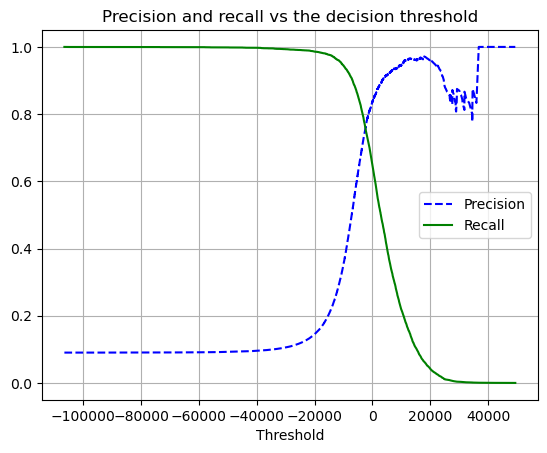

In [33]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [34]:
thresh_90_precision = thresholds[np.argmax(precisions>=0.90)]
thresh_90_precision

3370.019499143958

In [37]:
y_train_pred_90 = (y_scores>=thresh_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [38]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [39]:
from sklearn.metrics import roc_curve

In [42]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [54]:
def plot_roc_curve(fpr, tpr, label = False):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('FPR')
    plt.ylabel('TPR(recall)')
    plt.grid()

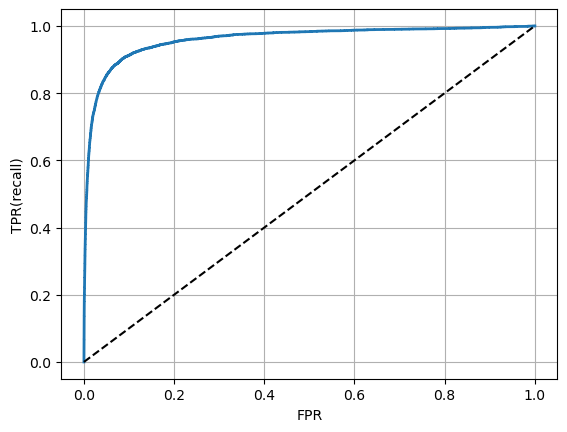

In [55]:
plot_roc_curve(fpr, tpr)
plt.show()

In [57]:
from sklearn.metrics import roc_auc_score

In [58]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3,
                                    method = 'predict_proba')

In [65]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

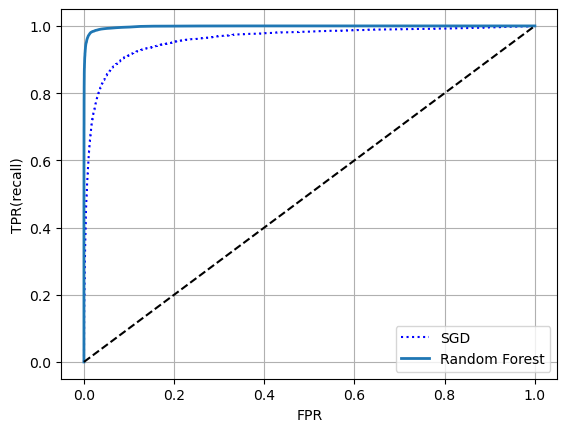

In [66]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [67]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

# Multi Class Classification
1. one vs one
2. one vs rest


In [68]:
from sklearn.svm import SVC

In [69]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)  # y_train, not y_train_5
svm_clf.predict([some_digit])

C:\Users\gangw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [71]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

C:\Users\gangw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [72]:
np.argmax(some_digit_scores)

5

In [73]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [75]:
svm_clf.classes_[5]

5

In [81]:
from sklearn.multiclass import OneVsRestClassifier

In [82]:
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

C:\Users\gangw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\gangw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\gangw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\gangw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\gangw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\gangw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

array([5], dtype=uint8)

In [83]:
len(ovr_clf.estimators_)

10

In [84]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [85]:
sgd_clf.predict([some_digit])

C:\Users\gangw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [86]:
sgd_clf.decision_function([some_digit])

C:\Users\gangw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [87]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.87365, 0.85835, 0.8689 ])

# Error Analysis

In [89]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3,
               scoring = 'accuracy')

array([0.8983, 0.891 , 0.9018])

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
plt.mathshow(conf_mx, cmap = ptl.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norms_conf_mx = conf_mx/row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.mathshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

# Multilabel Classificaiton
'''Then when the classifier is shown a picture
of Alice and Charlie, it should output [1, 0, 1] (meaning “Alice yes, Bob no,
Charlie yes”). Such a classification system that outputs multiple binary tags
is called a multilabel classification system.'''


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train>=7)
y_train_odd = (y_train%2==1)
y_multilabel = np.c_[y_train,y_train_odd]

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
knn_clf.predict([some_digit])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train, y_multilabel, cv = 3)
f1_score(y_multilabel, y_train_knn_pred, average = 'macro')

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")


# Multioutput Classification
Generalization of multilabel classification where each label can we muticlass

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test


In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit